#LightRAG: Simple and Fast Retrieval-Augmented Generation

Reference: https://arxiv.org/abs/2410.05779

In [1]:
!pip install lightrag-hku

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.8/917.8 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.6 MB/s eta 0:00:0

In [2]:
from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [3]:
!curl https://raw.githubusercontent.com/gusye1234/nano-graphrag/main/tests/mock_data.txt > ./book.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  184k  100  184k    0     0   773k      0 --:--:-- --:--:-- --:--:--  776k


In [5]:
!pip install nest-asyncio

In [6]:
from lightrag import LightRAG, QueryParam
from lightrag.llm import gpt_4o_mini_complete, gpt_4o_complete
import nest_asyncio  # Import nest_asyncio
import os

# Apply nest_asyncio to patch the event loop
nest_asyncio.apply()

WORKING_DIR = "./dickens"

if not os.path.exists(WORKING_DIR):
    os.mkdir(WORKING_DIR)

rag = LightRAG(
    working_dir=WORKING_DIR,
    llm_model_func=gpt_4o_mini_complete  # Use gpt_4o_mini_complete LLM model
    # llm_model_func=gpt_4o_complete  # Optionally, use a stronger model
)

with open("./book.txt") as f:
    rag.insert(f.read())

# Perform naive search
print(rag.query("What are the top themes in this story?", param=QueryParam(mode="naive")))

# Perform local search
print(rag.query("What are the top themes in this story?", param=QueryParam(mode="local")))

# Perform global search
print(rag.query("What are the top themes in this story?", param=QueryParam(mode="global")))

# Perform hybrid search
print(rag.query("What are the top themes in this story?", param=QueryParam(mode="hybrid")))

INFO:lightrag:Logger initialized for working directory: ./dickens
DEBUG:lightrag:LightRAG init with param:
  working_dir = ./dickens,
  chunk_token_size = 1200,
  chunk_overlap_token_size = 100,
  tiktoken_model_name = gpt-4o-mini,
  entity_extract_max_gleaning = 1,
  entity_summary_to_max_tokens = 500,
  node_embedding_algorithm = node2vec,
  node2vec_params = {'dimensions': 1536, 'num_walks': 10, 'walk_length': 40, 'window_size': 2, 'iterations': 3, 'random_seed': 3},
  embedding_func = {'embedding_dim': 1536, 'max_token_size': 8192, 'func': <function openai_embedding at 0x7b9bf3103640>},
  embedding_batch_num = 32,
  embedding_func_max_async = 16,
  llm_model_func = <function gpt_4o_mini_complete at 0x7b9bf3103130>,
  llm_model_name = meta-llama/Llama-3.2-1B-Instruct,
  llm_model_max_token_size = 32768,
  llm_model_max_async = 16,
  key_string_value_json_storage_cls = <class 'lightrag.storage.JsonKVStorage'>,
  vector_db_storage_cls = <class 'lightrag.storage.NanoVectorDBStorage'>,


DEBUG:lightrag:Trigger summary: "SCROOGE"


INFO:lightrag:Inserting 387 vectors to entities
INFO:lightrag:Inserting 269 vectors to relationships
INFO:lightrag:Writing graph with 389 nodes, 269 edges
INFO:lightrag:Truncate 39 to 3 chunks


The story of "A Christmas Carol" features several prominent themes that are central to its moral and narrative. 

One of the primary themes is **redemption**. The protagonist, Ebenezer Scrooge, embodies the possibility of personal transformation. Throughout the tale, he is confronted with the consequences of his past actions and attitudes, especially his greed and disdain for others, which leads him to a solitary and miserable existence. The visits from the three spirits serve as crucial turning points that allow Scrooge to recognize the importance of kindness, generosity, and human connection, ultimately leading to his redemption.

Another significant theme is **the importance of compassion and generosity**. Scrooge's initial character is marked by an absence of empathy, as he prioritizes money over relationships. However, through the experiences with the Ghosts of Christmas Past, Present, and Yet to Come, he learns to appreciate the joys of giving and the value of community. This the

INFO:lightrag:Local query uses 60 entites, 113 relations, 3 text units


### The Themes of "A Christmas Carol"

Charles Dickens' "A Christmas Carol" explores a multitude of themes that reflect social issues, personal transformation, and the essence of human connection. These themes, woven throughout the narrative, highlight the journey of the central character, Ebenezer Scrooge, and serve to critique societal norms of the time.

#### 1. Redemption and Transformation
One of the most prominent themes in the novella is redemption. Scrooge, initially portrayed as a greedy and misanthropic individual, undergoes a profound transformation. The Christmas spirit, represented through his encounters with the spirits of Christmas Past, Present, and Yet to Come, catalyzes this change. His journey from a cold-hearted miser to someone who embraces generosity and compassion serves as a powerful reminder of the possibility of personal redemption. This theme underscores the idea that it is never too late to change one's ways and highlights the transformative power of kindnes

INFO:lightrag:Global query uses 57 entites, 60 relations, 3 text units


In Charles Dickens' "A Christmas Carol," several prominent themes interweave through the narrative, deeply influencing the characters and their development. Among them, **redemption**, **compassion**, and **the contrast between wealth and poverty** stand out as pivotal motifs, resonating with contemporary audiences and offering profound societal commentary.

### Redemption 

The theme of redemption is central to Scrooge's transformation throughout the story. Initially depicted as a miser living a life devoid of joy and connection, Scrooge's encounters with various spirits—such as the Ghost of Christmas Past, the Ghost of Christmas Present, and the Ghost of Christmas Yet to Come—serve as catalysts for reflection. These supernatural visitations compel him to confront his past actions, rekindle his emotional connections, and ultimately embrace a kinder, more generous outlook on life. The process showcases that no matter how lost one might feel, there is always potential for change and red

INFO:lightrag:Local query uses 60 entites, 113 relations, 3 text units
INFO:lightrag:Global query uses 57 entites, 60 relations, 3 text units


In "A Christmas Carol" by Charles Dickens, several key themes emerge throughout the narrative, reflecting the complexities of human nature and the impact of social attitudes. The primary themes include redemption, the spirit of Christmas, societal responsibility, and the consequences of one's actions.

### Redemption

The theme of redemption is central to Scrooge's character arc as he transforms from a miserly, isolated individual into someone who embraces generosity and compassion. At the start, Scrooge embodies selfishness and disdain for the joy of Christmas, but through the supernatural visits from the three spirits, he confronts his past, present, and potential future. This journey illuminates the possibility of change and compassion, ultimately leading him to seek atonement for his past misdeeds. Scrooge's transformation signifies that it is never too late to change one's ways and make amends, showcasing the potential for personal growth in everyone.

### The Spirit of Christmas


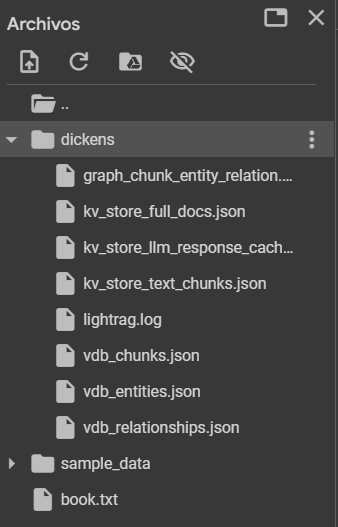